# Lab 4

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
from scipy.optimize import minimize
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import re
import networkx as nx

## Problem 1

In [2]:
def read_text(filename):
    with open(filename) as fin:
        text = fin.read()
    
    return re.sub(r'[ ]{2,}', ' ', re.sub(r'\s+', ' ', text)).lower()

### Question 1

In [3]:
def all_ngrams(text, n=2):
    ngrams = []
    
    for i in range(0, len(text)-n+1):
        ngrams.append(str(text[i:i+n]))
    
    return ngrams

original_text = read_text("plagiarized/text1_original.txt")
plagiarized_text = read_text("plagiarized/text1_plagiarized.txt")

In [4]:
print(all_ngrams("Hello world"))

['He', 'el', 'll', 'lo', 'o ', ' w', 'wo', 'or', 'rl', 'ld']


### Question 2

In [5]:
def ngram_frequencies(text, n=2):
    ngrams = all_ngrams(text, n)
    counts = {}
    
    for ngram in ngrams:
        if ngram in counts:
            counts[ngram] += 1
        else:
            counts[ngram] = 1
    
    return counts

In [6]:
freq_original = ngram_frequencies(original_text)
freq_plagiarized = ngram_frequencies(plagiarized_text)
print(freq_original['th'])
print(freq_plagiarized['th'])

11
14


### Question 3

In [7]:
def cosine_similarity(freqs1, freqs2):
    keys = set(freqs1).union(set(freqs2))
    freq1 = np.zeros(len(keys))
    freq2 = np.zeros(len(keys))
    
    for i, j in enumerate(keys):
        if j in freqs1:
            freq1[i] = freqs1[j]
        if j in freqs2:
            freq2[i] = freqs2[j]
    
    result = np.dot(freq1, freq2) / (np.sqrt(np.dot(freq1, freq1))*np.sqrt(np.dot(freq2, freq2)))    
    
    return result   

In [8]:
print(cosine_similarity(freq_original, freq_plagiarized))

0.879488026842


### Question 4

In [9]:
freq1_1 = {'a':1, 'b':0, 'c':0, 'd':1}
freq1_2 = {'a':0, 'b':1, 'c':1, 'd':0}
freq3_1 = {'a':2, 'b':0, 'c':0, 'd':2}

print("Orthogonal")
print(cosine_similarity(freq1_1, freq1_2))
print()
print("Identical")
print(cosine_similarity(freq1_1, freq1_1))
print()
print("Scaled")
print(cosine_similarity(freq1_1, freq3_1))

Orthogonal
0.0

Identical
1.0

Scaled
1.0


### Question 5

In [10]:
def bootstrap_plagiarism(text, n=2):
    ngrams = all_ngrams(text, n)
    
    new_ngrams = np.random.choice(ngrams, len(ngrams), replace=True)    
    
    return new_ngrams

In [11]:
plagiarised_ngrams = [bootstrap_plagiarism(original_text) for i in range(0, 1000)]
ngram_frequencie = [ngram_frequencies(''.join(i)) for i in plagiarised_ngrams]
similarities = [cosine_similarity(freq_original, i) for i in ngram_frequencie]

In [12]:
print(similarities)

[0.86130801952035696, 0.88538485455318894, 0.87647244853124784, 0.86152891801768039, 0.87091404682673268, 0.86749188499124452, 0.87761464748817919, 0.84039861473675137, 0.87591411819910592, 0.84496491876284396, 0.86888103717208132, 0.85880884357655995, 0.88313079520443905, 0.87828494282841552, 0.87450948342970636, 0.86195171916060842, 0.8790958023451475, 0.85671383092319642, 0.85771092477145294, 0.85145600969511159, 0.87157258771668555, 0.86441588568478134, 0.88133545683023939, 0.88427097201927785, 0.86930733003342942, 0.88832890811017862, 0.87606164877746706, 0.86364894993689856, 0.87887979953872364, 0.8785208425645894, 0.87037184997104611, 0.8534540280866183, 0.86302910306970415, 0.8853009921212619, 0.87864708351973297, 0.86472178367924468, 0.88871819170511934, 0.88240029895134098, 0.88428245283348483, 0.85431838747375477, 0.87130579828032717, 0.84965024559632751, 0.87889947594162232, 0.89077648156247746, 0.85567681612885838, 0.88384382185417931, 0.87469046791044325, 0.90731965702806

We have to reject the hypothesis that the text is plagiarised.

We only sampled other plagiarised texts and don't know anything about texts which aren't plagiarised. And we made the assumption for plagiarism as described in 6.

### Question 6

The assumption is that we only use the ngrams of the original text. They can be used in a different order or multiple times, but we only use the ngrams which are used in the original texts.

### Question 7

In [13]:
large_text = read_text("plagiarized/power_of_truth_25kb.txt")
ngram_1 = ngram_frequencies(large_text, 1)
ngram_3 = ngram_frequencies(large_text, 3)
ngram_6 = ngram_frequencies(large_text, 6)
ngram_9 = ngram_frequencies(large_text, 9)

In [14]:
ngram_1_list = sorted(list(ngram_1.values()), reverse=True)
ngram_3_list = sorted(list(ngram_3.values()), reverse=True)
ngram_6_list = sorted(list(ngram_6.values()), reverse=True)
ngram_9_list = sorted(list(ngram_9.values()), reverse=True)

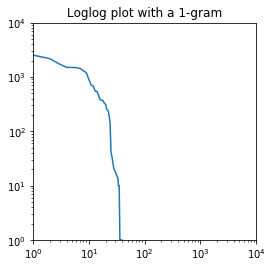

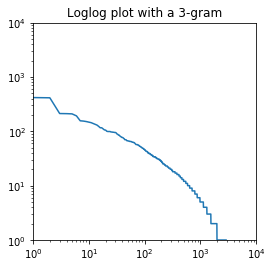

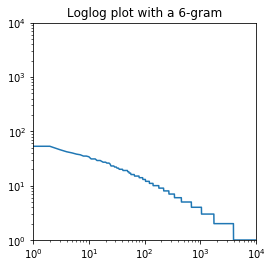

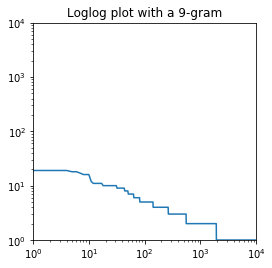

In [15]:
plt.figure(figsize=(4,4))
plt.title("Loglog plot with a 1-gram")
plt.plot(ngram_1_list)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 10**4, 1, 10**4])
plt.show()

plt.figure(figsize=(4,4))
plt.title("Loglog plot with a 3-gram")
plt.plot(ngram_3_list)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 10**4, 1, 10**4])
plt.show()

plt.figure(figsize=(4,4))
plt.title("Loglog plot with a 6-gram")
plt.plot(ngram_6_list)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 10**4, 1, 10**4])
plt.show()

plt.figure(figsize=(4,4))
plt.title("Loglog plot with a 9-gram")
plt.plot(ngram_9_list)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 10**4, 1, 10**4])
plt.show()

It doesn't seem to hold when having a n of 1. This for the simple reason that this are just letters so the Zipf law wont hold for this.

At the other occasions it seems to hold. 

## Problem 2

I used 8 different books. Of 4 authors, 2 books each (paired as (0,1)(2,3)(4,5) and (5,6).

### Question 1

In [43]:
book1 = read_text("problem2/book1.txt")
book2 = read_text("problem2/book2.txt")
book3 = read_text("problem2/book3.txt")
book4 = read_text("problem2/book4.txt")
book5 = read_text("problem2/book5.txt")
book6 = read_text("problem2/book6.txt")
book7 = read_text("problem2/book7.txt")
book8 = read_text("problem2/book8.txt")

freq1 = ngram_frequencies(book1, 2)
freq2 = ngram_frequencies(book2, 2)
freq3 = ngram_frequencies(book3, 2)
freq4 = ngram_frequencies(book4, 2)
freq5 = ngram_frequencies(book5, 2)
freq6 = ngram_frequencies(book6, 2)
freq7 = ngram_frequencies(book7, 2)
freq8 = ngram_frequencies(book8, 2)

In [38]:
frequencies = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8]

In [39]:
matrix = np.empty([8, 8])

for i in range(0, 8):
    for j in range(0,8):
        matrix[i,j] = cosine_similarity(frequencies[i], frequencies[j])
        
print(matrix)

[[ 1.          0.99289967  0.97069487  0.98014212  0.97678436  0.99016675
   0.97541779  0.96470502]
 [ 0.99289967  1.          0.97851635  0.98867698  0.98803488  0.98768642
   0.98008486  0.97701598]
 [ 0.97069487  0.97851635  1.          0.9843055   0.97564988  0.970969
   0.97407854  0.97215121]
 [ 0.98014212  0.98867698  0.9843055   1.          0.98728972  0.98136774
   0.9797758   0.97902465]
 [ 0.97678436  0.98803488  0.97564988  0.98728972  1.          0.98194895
   0.97244425  0.97703286]
 [ 0.99016675  0.98768642  0.970969    0.98136774  0.98194895  1.
   0.9785163   0.96974289]
 [ 0.97541779  0.98008486  0.97407854  0.9797758   0.97244425  0.9785163
   1.          0.98941829]
 [ 0.96470502  0.97701598  0.97215121  0.97902465  0.97703286  0.96974289
   0.98941829  1.        ]]


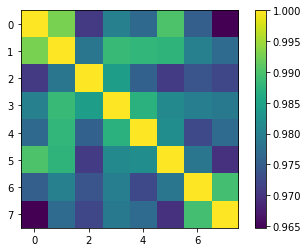

In [19]:
plt.imshow(matrix)
plt.colorbar()
plt.show()

### Question 2

The nodes correspond with book[number - 1]

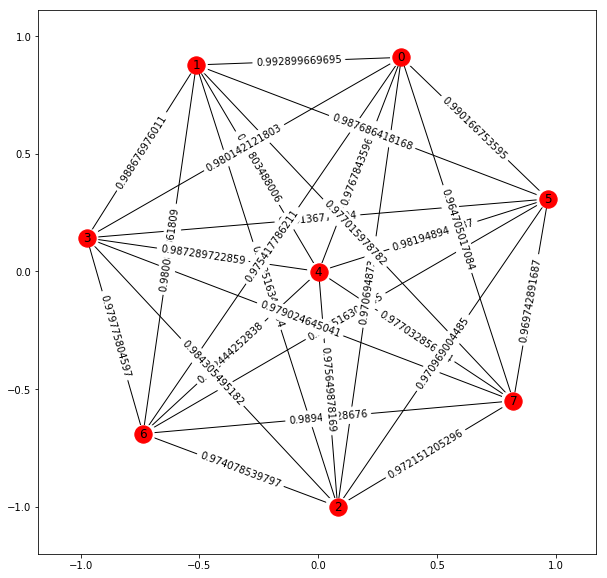

In [20]:
plt.figure(figsize=(10,10))
G = nx.Graph()

max_val = np.max(matrix)
min_val = np.min(matrix)

new_matrix = ((matrix - min_val) / (max_val - min_val)) * 100

for i in range(0, 8):
    for j in range(0,8):
        G.add_edge(i, j, attr_dict={'weight': new_matrix[i,j]})
        
pos=nx.spring_layout(G, weight='weight')

labels = nx.get_edge_attributes(G,'weight')
edge_labels = dict([((u,v),matrix[u][v])
                 for u,v, __ in G.edges(data=True)])

nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

### Question 3

The books are on the x axis.

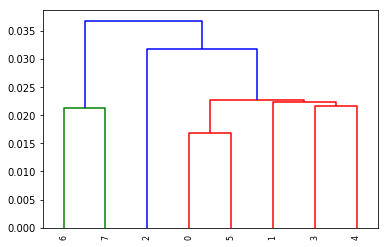

In [21]:
Z = linkage(np.squeeze(matrix))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

### Question 4 

In [22]:
bootstrap_matrix = np.empty([8, 8])
books = [book1, book2, book3, book4, book5, book6, book7, book8]


for i in range(0, 8):
    print(i)
    for j in range(0,8):
        mean = 0

        for _ in range(10):
            mean += cosine_similarity(ngram_frequencies(''.join(bootstrap_plagiarism(books[i]))),
                                     ngram_frequencies(''.join(bootstrap_plagiarism(books[j]))))
        bootstrap_matrix[i, j] = mean / 10

0
1
2
3
4
5
6
7


In [40]:
print(np.mean(bootstrap_matrix))
print(np.mean(matrix))

0.990529481056
0.9820169254


So the means are close.

In [41]:
bootstrap_matrix2 = np.empty([8, 8])
books = [book1, book2, book3, book4, book5, book6, book7, book8]


for i in range(0, 8):
    for j in range(0,8):
        bootstrap_matrix2[i, j] = cosine_similarity(ngram_frequencies(''.join(bootstrap_plagiarism(books[i]))),
                                     ngram_frequencies(''.join(bootstrap_plagiarism(books[j]))))
        

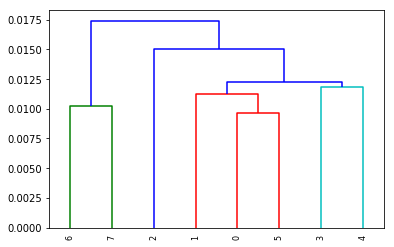

In [42]:
Z = linkage(np.squeeze(bootstrap_matrix2))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

Yes it is stable, the clustering is almost the same.

### Question 5

In [103]:
def read_text2(filename, size=25000):
    with open(filename) as fin:
        text = fin.read()[:size]
    
    return re.sub(r'[ ]{2,}', ' ', re.sub(r'\s+', ' ', text)).lower()

In [104]:
book1_ = read_text2("problem2/book1.txt")
book2_ = read_text2("problem2/book2.txt")
book3_ = read_text2("problem2/book3.txt")
book4_ = read_text2("problem2/book4.txt")
book5_ = read_text2("problem2/book5.txt")
book6_ = read_text2("problem2/book6.txt")
book7_ = read_text2("problem2/book7.txt")
book8_ = read_text2("problem2/book8.txt")

freq1_ = ngram_frequencies(book1_, 2)
freq2_ = ngram_frequencies(book2_, 2)
freq3_ = ngram_frequencies(book3_, 2)
freq4_ = ngram_frequencies(book4_, 2)
freq5_ = ngram_frequencies(book5_, 2)
freq6_ = ngram_frequencies(book6_, 2)
freq7_ = ngram_frequencies(book7_, 2)
freq8_ = ngram_frequencies(book8_, 2)

In [105]:
frequencies_ = [freq1_, freq2_, freq3_, freq4_, freq5_, freq6_, freq7_, freq8_]

In [106]:
matrix_ = np.empty([8, 8])

for i in range(0, 8):
    for j in range(0,8):
        matrix_[i,j] = cosine_similarity(frequencies_[i], frequencies_[j])

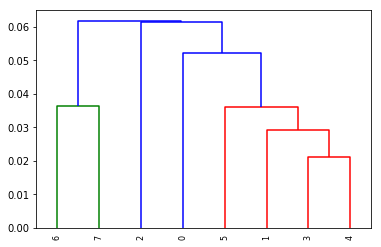

In [107]:
Z = linkage(np.squeeze(matrix_))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

Around 25000 it quite stable. If size in read_text2 is changed to 20000 you can see it's not stable anymore (it runs fast!)

### Question 6

### Question 7

Because with bigger ngrams the data set becomes smaller. Because the amount of data is the total length divided by n. So less data with a bigger n. 

### Question 8

In [30]:
freq1 = ngram_frequencies(book1, 32)
freq2 = ngram_frequencies(book2, 32)
freq3 = ngram_frequencies(book3, 32)
freq4 = ngram_frequencies(book4, 32)
freq5 = ngram_frequencies(book5, 32)
freq6 = ngram_frequencies(book6, 32)
freq7 = ngram_frequencies(book7, 32)
freq8 = ngram_frequencies(book8, 32)

In [31]:
frequencies = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8]

In [32]:
matrix = np.empty([8, 8])

for i in range(0, 8):
    for j in range(0,8):
        matrix[i,j] = cosine_similarity(frequencies[i], frequencies[j])
        
print(matrix)

[[ 1.          0.0283174   0.07386936  0.07791715  0.03882879  0.03054028
   0.07229198  0.02051573]
 [ 0.0283174   1.          0.08394084  0.08861061  0.04417282  0.03477532
   0.08224283  0.02332915]
 [ 0.07386936  0.08394084  1.          0.24799343  0.12350936  0.09707988
   0.23032549  0.06536672]
 [ 0.07791715  0.08861061  0.24799343  1.          0.13320059  0.10477339
   0.24280655  0.06890886]
 [ 0.03882879  0.04417282  0.12350936  0.13320059  1.          0.05273506
   0.12094055  0.03431758]
 [ 0.03054028  0.03477532  0.09707988  0.10477339  0.05273506  1.
   0.09503399  0.02697623]
 [ 0.07229198  0.08224283  0.23032549  0.24280655  0.12094055  0.09503399
   1.          0.06435707]
 [ 0.02051573  0.02332915  0.06536672  0.06890886  0.03431758  0.02697623
   0.06435707  1.        ]]


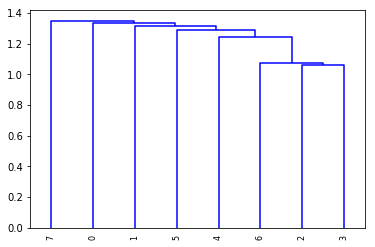

In [33]:
Z = linkage(np.squeeze(matrix))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

## Problem 3

### Question 1

In [34]:
def ngram_conditional_frequencies(text, n):
    ngrams = all_ngrams(text, n)
    counts = {}
    
    for i in ngrams:
        counts[i] = {}
        for j in ngrams:
            counts[i][j] = 0
    
    for i in range(1, len(ngrams)):
        cur_ngram = ngrams[i]
        prev_ngram = ngrams[i - 1]
        if prev_ngram in counts[cur_ngram]:
            counts[cur_ngram][prev_ngram] += 1
        else:
            counts[cur_ngram][prev_ngram] = 1
    
    return counts

### Question 2

SyntaxError: invalid syntax (<ipython-input-35-ee0789612cc2>, line 1)